In [5]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def plot_digit(dgts, tit = None):
    f, ax = plt.subplots()
    ax.imshow(dgts.reshape(30, 30),cmap='gray')
    if tit: ax.set_title(tit)
    plt.show()

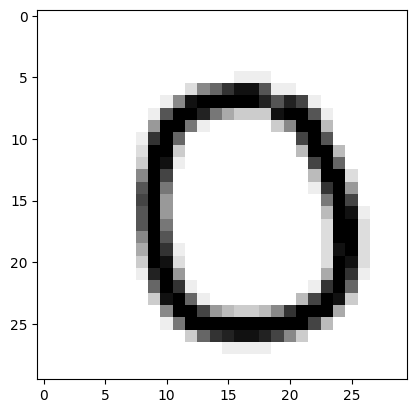

In [6]:
def get_image_vect(path):
    imagen_original = Image.open(path)
    imagen_redimensionada = imagen_original.resize((30, 30))
    imagen_escala_de_grises = imagen_redimensionada.convert("L")
    datos_pixeles = list(imagen_escala_de_grises.getdata())
    datos_pixeles_normalizados = [int(pixel / 255 * 15) for pixel in datos_pixeles]
    return datos_pixeles_normalizados
    

def get_trainng_digits(path):
    data = []
    labels = []
    digit_ns = [f for f in os.listdir(path)]
    for n, digit_n in enumerate(digit_ns):
        imagen_original = Image.open(os.path.join(path,digit_n))
        imagen_redimensionada = imagen_original.resize((30, 30))
        imagen_escala_de_grises = imagen_redimensionada.convert("L")
        datos_pixeles = list(imagen_escala_de_grises.getdata())
        datos_pixeles_normalizados = [int(pixel / 255 * 15) for pixel in datos_pixeles]
        data.append(datos_pixeles_normalizados)
        labels.append(digit_n.split('_')[0])
    return {'data': np.array(data), 'labels': labels}
digits_path = '../data/digits'
trainng_digits = get_trainng_digits(digits_path)

plot_digit(trainng_digits['data'][0], tit = None)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

Xtrain, Xtest, ytrain, ytest = train_test_split(trainng_digits['data'], trainng_digits['labels'], random_state=0, test_size=.3)

print(f"Total data size: {len(trainng_digits['data'])}\nTraining data size: {len(ytrain)}\nTesting data size: {len(ytest)}")

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

Total data size: 87
Training data size: 60
Testing data size: 27
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89        10
           3       0.75      1.00      0.86         3

    accuracy                           0.93        27
   macro avg       0.91      0.95      0.92        27
weighted avg       0.94      0.93      0.93        27



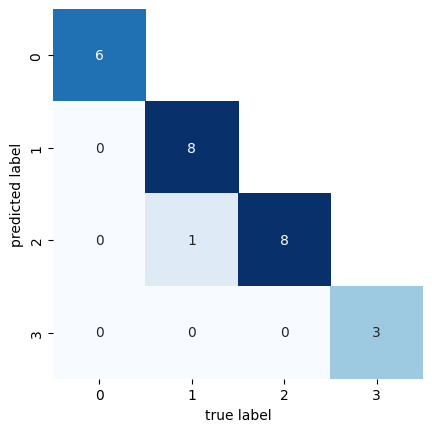

['digit_recognition_model.pkl']

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, ypred)
mask = np.triu(np.ones_like(mat.T), k=1)

sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, cmap='Blues', mask=mask) 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

digit_incorrectos = np.where(ytest != ypred)[0]

import joblib
joblib.dump(model, 'digit_recognition_model.pkl')

In [10]:
loaded_model = joblib.load('digit_recognition_model.pkl')

imagen_original = Image.open(os.path.join(digits_path,'3_1.png'))
imagen_redimensionada = imagen_original.resize((30, 30))
imagen_escala_de_grises = imagen_redimensionada.convert("L")
datos_pixeles = list(imagen_escala_de_grises.getdata())
datos_pixeles_normalizados = [int(pixel / 255 * 15) for pixel in datos_pixeles]

loaded_model.predict([datos_pixeles_normalizados])[0]

'3'